<a href="https://colab.research.google.com/github/csaatechnicalarts/ML_Bootcamp/blob/main/OSMnx_Bootcamp/Intro_OSMnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Open Street Maps Python Library (OSMnx)

## Content Outline
* Introduction
* Relevant Python Packages
* OpenstreetMap Data Structures and Constructs
* Acquiring Points of Interest (POI) Data
* Acquiring Polygonal Data
* Acquiring Graph Data
* Adding a Basemap

## Introduction

OSMnx is a Python package used for modeling ubran geographic features and relationships. Drawing on volunteer-supplied data at [OpenstreetMap](https://wiki.openstreetmap.org/), OSMnx facilitates the geoanalytics of various aspects of urban life such as travel networks and accesibility, zoning or public health. OSMnx is a useful tool for urban planning. The global data that this API opens up is publicly accessible through the OpenstreetMap [portal](https://www.openstreetmap.org/).

In this notebook we'll go over some of the basic features of OSMnx.

## Relevant Python Packages

For starters we'll need to load the OSMnx package together with Matplotlib for visualization. Under the hood, OSMnx extends the [Overpass](https://wiki.openstreetmap.org/wiki/Overpass_API) package, wrapping it in a more elegant API. OSMnx also uses Geopandas, which in turn extends the Pandas library with geocoding features.

In [1]:
!pip install osmnx
!pip install matplotlib

import osmnx as ox
import matplotlib
import matplotlib.pyplot as plt

print(ox.__version__)
print(matplotlib.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 2.9 MB/s eta 0:00:00
2.0.4
3.10.0


## OpenstreetMap Data Structures and Constructs

OSM abstracts geographic features as geometric primitives: **points (nodes)**, **lines (ways)** and **polygons (relations)**. Openstreetmap uses these primitives as the basis to encode urban constructs. For example, points locate urban entities such as cafes, museums or hospitals. Together they are conceptually known as *points of interest* (POI). As building blocks, an ordered set of points constitute lines that represent road connections. In turn these lines become the building blocks of polygons which stand for physical entities (buildings or parks) or virtual regions (towns, districts, etc.)

OSM assigns unique IDs to every primitive it tracks. Some OSMnx functions can lookup these primitives by their canonical name or by a string representation of their OSM ID. For entities that are nondescript -- such as a corner of a park -- we only have the OSM ID  as a reference handle.

For example, as OSM sees it, Ueno may refer to a railway station in Tokyo, Japan; at the same time it also refers to the administrative boundary in the metropolis. The first entity is a node while the other is a relation. The OSM ID distinguishes between the two clearly ("N" as a node; "R" as a relation):


*   Ueno Station: "N8300320717"
*   Ueno Admin: "R18158684"





## Acquiring Points of Interest (POI) Data

The *geodataframe* is the basic data structure of OSMnx. Organized as a tabular set of rows and columns, the GDF encodes urban data such as geometry, address, amenity categories, contact information (telephone, email or website) -- information we deal with when we talk about places we live or work in, a destinations we travel to or a region worth noting. Essentially, working with OSMnx involves fetching geodataframes from Openstreetmap and manipulating the information in order to transform it in ways that are relevant to us, perhaps as a table, a map or as a data plot.

![](https://github.com/csaatechnicalarts/ML_Bootcamp/blob/main/OSMnx_Bootcamp/minato_city-768px.png?raw=true)

Let's get the information for Minato, a city in Metopolitan Tokyo (not to be confused with Minato Ward in Nagoya). The city is outlined in orange in the screenshot above taken from Openstreetmap. The following code uses *features_from_place()* to query OSM. We supply the place we're interested in -- formally known as the OSM *administrative boundary* -- along with a dictionary of *tags* to filter the information we want.

OSM tags are organized in a sets of keys and tags. In Python they are reprsented as a dictionary type. A handy reference for the top-level OSM keys are found [here](https://wiki.openstreetmap.org/wiki/Category:Top-level_keys).

In [2]:
minato_poi = ox.features_from_place('Minato, Tokyo', tags={'amenity': ['cafe', 'pub'], 'tourism':['museum', 'hotel', 'attraction'], 'building':['office', 'retail']})
print(f"{len(minato_poi)} elements in {type(minato_poi)}\n\n")
print(minato_poi.columns)
minato_poi.head(3)

1292 elements in <class 'geopandas.geodataframe.GeoDataFrame'>


Index(['geometry', 'amenity', 'branch', 'name', 'name:en', 'phone', 'source',
       'wheelchair', 'was:cuisine', 'was:name',
       ...
       'type', 'alt_name:es', 'communication:radio', 'contact:tiktok',
       'man_made', 'material', 'name:et', 'tower:construction', 'tower:type',
       'building:part'],
      dtype='object', length=207)


geometry amenity branch      name  \
element id                                                               
node    393075631  POINT (139.74866 35.64395)    cafe  田町東口店  エクセルシオール   
        474605280  POINT (139.75225 35.66847)     pub    NaN    山本魚吉商店   
        474605284  POINT (139.75436 35.66781)     pub    NaN        月島   

                      name:en         phone                 source wheelchair  \
element id                                                                      
node    393075631    EXELCIOR  03-5730-2620  image,2012-10-19;Bing        yes   
        474605280         NaN           NaN                    NaN        NaN   
        474605284  Tsukishima           NaN                    NaN        NaN   

                  was:cuisine was:name  ... type alt_name:es  \
element id                              ...                    
node    393075631         NaN      NaN  ...  NaN         NaN   
        474605280        お好み焼       泉州  ...  NaN         NaN   
        474605284         NaN      NaN  ...  NaN         NaN   

                  communication:radio contact:tiktok man_made material  \
element id                                                               
node    393075631                 NaN            NaN      NaN      NaN   
        474605280                 NaN            NaN      NaN      NaN   
        474605284                 NaN            NaN      NaN      NaN   

                  name:et tower:construction tower:type building:part  
element id                                                             
node    393075631     NaN                NaN        NaN           NaN  
        474605280     NaN                NaN        NaN           NaN  
        474605284     NaN                NaN        NaN           NaN  

[3 rows x 207 columns]

Can we query OSM for information and visualize it as a plot? Yes, we can. In the example below we turn to the *geocode_to_gdf()* to retrieve polygonal information suitable for plotting. Commented out, we also show the same function call using the OSM ID for Minato City: 1761717.



<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

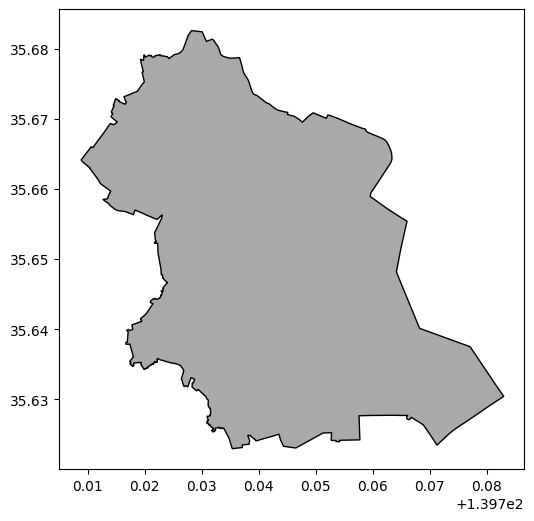

In [3]:
admin_minato = ox.geocode_to_gdf('Minato, Tokyo')
print(type(admin_minato))
admin_minato.plot(color='darkgrey', edgecolor='k', figsize=(6,6))

# osm_id = "R1761717"
# gdf = ox.geocode_to_gdf(query=osm_id, by_osmid=True)


Using Matplotlib, we can combine information about Minato points of interest (POI) together with its polygonal representation into one infographic. In the example below, we make more than one *plot()* call to accomplish this. Note that we plot POIs by selecting a column-key of the GeoDataFrame, in this case *amenity*.

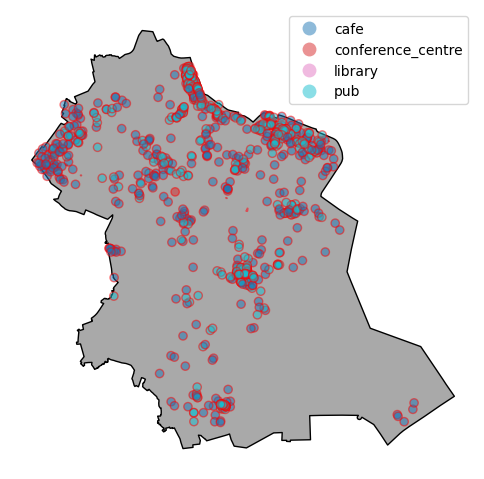

In [4]:
# Create a plot to visualize the admin boundary and POIs
f, ax = plt.subplots(1, 1, figsize=(6,6))

# Plot the administrative boundary
admin_minato.plot(ax=ax, color='darkgrey', edgecolor='k')

# Plot the amenity POI
minato_poi.plot(column='amenity', ax=ax, alpha=0.5, edgecolor='red', legend=True)

# Customize the plot
ax.axis('off')
plt.show()

## Acquiring Polygonal Data

While plotting points of intererest is useful, the information doesn't convey the geographic scope of particular urban features such as buildings, for example. These are urban entities better visualized as polygons.

Let's begin by re-querying OSM about the Minato administration boundary. Then let's focus on a subset of GeoDataFrame, the polygons for this administrative region. Finally, with the polygonal data in hand, let's filter the information according to the same tags we've used before.

In [5]:
minato_district = ox.geocode_to_gdf('Minato, Tokyo')
print(type(minato_district))

minato_polygon = minato_district.geometry.values[0]
print(type(minato_polygon))

minato_parks = ox.features_from_polygon(minato_polygon, tags={'leisure': 'park'})
print(type(minato_parks))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'geopandas.geodataframe.GeoDataFrame'>


What is the shapely data type? According to the [Shapely documentation](https://shapely.readthedocs.io):

> Shapely is a BSD-licensed Python package for manipulation and analysis of planar geometric objects.

In [6]:
print(f"{len(minato_parks)} elements in {type(minato_parks)}\n\n")
minato_parks.columns

148 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




Index(['geometry', 'created_by', 'leisure', 'name', 'name:en', 'name:de',
       'name:es', 'name:ja', 'name:zh', 'opening_hours', 'tourism', 'wikidata',
       'wikimedia_commons', 'wikipedia', 'name:ja_rm', 'source', 'layer',
       'note', 'note:ja', 'source_ref', 'toilets:wheelchair', 'wheelchair',
       'name:ko', 'name:ja_kana', 'description', 'operator',
       'addr:block_number', 'addr:city', 'addr:housenumber',
       'addr:neighbourhood', 'addr:province', 'addr:quarter', 'ref',
       'addr:postcode', 'surface', 'name:ru', 'wikipedia:en', 'check_date',
       'smoking', 'operator:type', 'alt_name:en', 'area', 'name:ja-Hira',
       'name:ja-Latn', 'type', 'roof:material', 'access', 'name:ar',
       'name:ceb', 'name:fa', 'name:fr', 'name:it'],
      dtype='object')

OK, as we've done earlier for the POIs, let's overlay plots for the two polygonal data sets we've gathered.

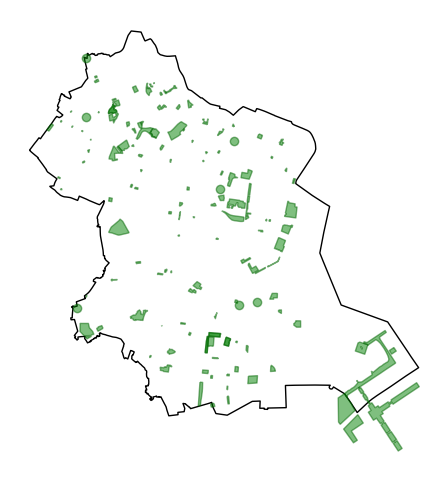

In [7]:
# Create a plot to visualize the admin boundary and park polygons
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato City
minato_parks.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen')

# Customize the plot
ax.axis('off')
plt.show()

Now that we've looked at the park amenities at Minato City, let's inspect all the building features regardless of subtype and pass it onto Matplotlib.

In [8]:
minato_buildings = ox.features_from_polygon(minato_polygon, tags={'building': True})
print(f"{len(minato_buildings)} elements in {type(minato_buildings)}\n\n")
minato_buildings.columns

26121 elements in <class 'geopandas.geodataframe.GeoDataFrame'>




Index(['geometry', 'building', 'name', 'note', 'note:ja', 'source',
       'source_ref', 'name:en', 'level', 'name:ja',
       ...
       'type', 'name:zh-Hans-CN', 'name:zh-Hant-TW', 'alt_name:es',
       'alt_name:zh', 'communication:radio', 'contact:tiktok', 'name:et',
       'alt_name_1', 'rugby'],
      dtype='object', length=295)

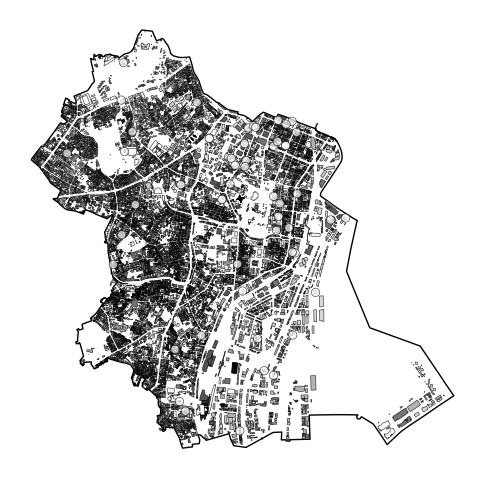

In [9]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks in Minato City
minato_buildings.plot(ax=ax, cmap = 'Greys', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)

# Customize the plot
ax.axis('off')
plt.show()

With a little variation to the Matplotlib function calls, we can visualize the parks and buildings maps together.

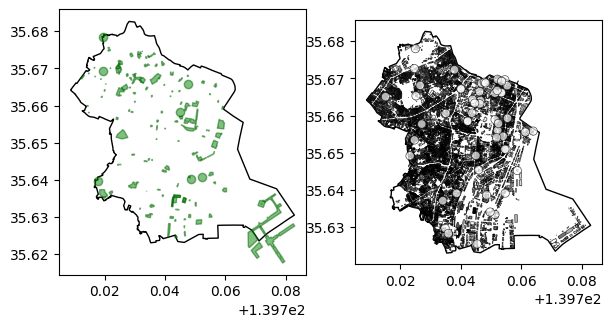

In [10]:
f, ax = plt.subplots(1, 2, figsize=(7, 4))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax[0], color='none', edgecolor='k')

# Plot the parks in Minato City
minato_parks.plot(ax=ax[0], color='green', alpha=0.5, edgecolor='darkgreen')

# Plot the Minato administrative boundary
minato_district.plot(ax=ax[1], color='none', edgecolor='k')

# Plot the parks in Minato City
minato_buildings.plot(ax=ax[1], cmap = 'Greys', edgecolor = 'black', alpha = 0.7, linewidth = 0.5)

plt.show()

## Acquiring Graph Data

Urban analytics wouldn't be complete without road networks. In OSM, that information is embedded in GDFs as graphs where a line represents a path and a node represents an intersection. OSM graphs are multi-directed graphs: a node is connected with roadways that are inbound or outbound (directed); several paths converge on a node junction (multi connected).

Let's see how we can retrieve the graph data for Minato City.

The sequence of OSMnx operations are:
* Retrieve GeoDataFrame data from OSM
* Extract the polygonal data from the GDF
* Given the set polygons, retrieve the graph network from OSM

In [11]:
minato_district = ox.geocode_to_gdf('Minato, Tokyo')
print(type(minato_district))

minato_polygon = minato_district.geometry.values[0]
print(type(minato_polygon))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'shapely.geometry.polygon.Polygon'>


In [12]:
# Download the road network for all transport modes
minato_roads = ox.graph_from_polygon(minato_polygon, network_type='drive')
print("Type of the road network graph (all modes):", type(minato_roads))
print("Number of nodes (all modes):", minato_roads.number_of_nodes())
print("Number of edges (all modes):", minato_roads.number_of_edges())

Type of the road network graph (all modes): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (all modes): 2972
Number of edges (all modes): 6625


At this point our goal is to display the road network as a map bounded by the Minato City administrative region. To get there, we first need to transform the graph data into another GeoDataFrame.

In [13]:
# Convert the network graph to GeoDataFrames for nodes and edges
nodes, edges = ox.graph_to_gdfs(minato_roads)

# Display the first few rows of the nodes GeoDataFrame
display(nodes.head(3))

# Display the first few rows of the edges GeoDataFrame
display(edges.head(3))

# Print the features stored in each GeoDataFrame
print("Keys in the nodes table:", list(nodes.keys()))
print("Keys in the edges table:", list(edges.keys()))
print()

# Print the total number of nodes and edges
print("Number of nodes in the node table:", len(nodes))
print("Number of edges in the node table:", len(edges))

,y,x,highway,ref,street_count,junction,geometry
osmid,,,,,,,
31236584,35.634935,139.768683,motorway_junction,1101,3,NaN,POINT (139.76868 35.63494)
31236646,35.634417,139.777989,NaN,NaN,3,NaN,POINT (139.77799 35.63442)
31236657,35.633476,139.778439,NaN,NaN,3,NaN,POINT (139.77844 35.63348)


,,,osmid,bridge,highway,lanes,oneway,reversed,length,geometry,name,ref,maxspeed,access,tunnel,width,junction
u,v,key,,,,,,,,,,,,,,,
31236584,31236646,0,"[4848889, 4848756, 820214407]",yes,motorway_link,1,True,False,971.162374,"LINESTRING (139.76868 35.63494, 139.76895 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31236646,573342136,0,333682057,yes,tertiary,NaN,True,False,40.061292,"LINESTRING (139.77799 35.63442, 139.77824 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31236657,298984113,0,863283179,yes,tertiary,NaN,True,False,101.078790,"LINESTRING (139.77844 35.63348, 139.77788 35.6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keys in the nodes table: ['y', 'x', 'highway', 'ref', 'street_count', 'junction', 'geometry']
Keys in the edges table: ['osmid', 'bridge', 'highway', 'lanes', 'oneway', 'reversed', 'length', 'geometry', 'name', 'ref', 'maxspeed', 'access', 'tunnel', 'width', 'junction']

Number of nodes in the node table: 2972
Number of edges in the node table: 6625


No we can take this GDF and visualize it.

(np.float64(139.70503459),
 np.float64(139.78663941),
 np.float64(35.620055535000006),
 np.float64(35.685632365))

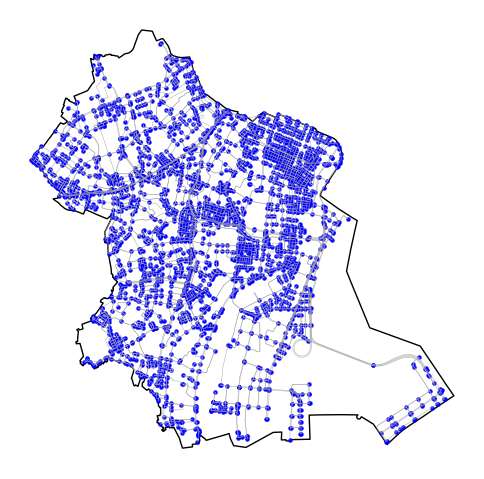

In [14]:
f, ax = plt.subplots(1,1,figsize=(6,6))

# Plot the Minato administrative boundary
minato_district.plot(ax=ax, color='none', edgecolor='k')

nodes.plot(ax=ax, color = 'blue', markersize = 5, alpha = 0.9)
edges.plot(ax=ax, color = 'darkgrey', linewidth = 0.4, alpha = 0.9)

ax.axis('off')

## Adding a Basemap

In the introductory section we showed a screen shot of Minato City taken directly from the Openstreetmap site. We can also achieve something like that with OSMnx combined with the Contextily package, overlaying OSM geometries over a map image in the background.

The [Contextily](https://contextily.readthedocs.io/en/latest/) site describes itself as a package to retrieve tile maps from the internet. In the background, the Contextily API queries a number of tile map providers, such as ESRI or CartoDB. For our purposes, we'll re-render on of our Minato POI map (cafe, library, etc.) with a basemap provided by Contextily.

In [16]:
!pip install contextily
import contextily as ctx

print(ctx.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.8 MB/s eta 0:00:00
1.6.2


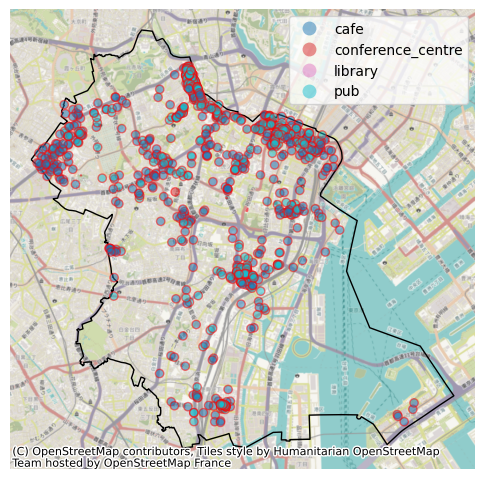

In [20]:
# Create a plot to visualize the admin boundary and points of interest
f, ax = plt.subplots(1, 1, figsize=(6,6))

# Plot the administrative boundary
admin_minato.plot(ax=ax, color='None', edgecolor='k')

# Plot the amenity POI
minato_poi.plot(column='amenity', ax=ax, alpha=0.5, edgecolor='red', legend=True)

# Query ESRI to add basemap using Contextily
ctx.add_basemap(ax, crs = admin_minato.crs, url=ctx.providers.Esri.WorldTopoMap)

# Customize the plot
ax.axis('off')
plt.show()